<a href="https://colab.research.google.com/github/nattntn/DPDM2024/blob/main/Classification_(dpdm24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [1]:
# prompt: load kdd99 dataset using sklearn

from sklearn.datasets import fetch_kddcup99

# Load the KDD Cup 1999 dataset
data = fetch_kddcup99()

# Access the data and target variables
X = data.data
y = data.target

print(X.shape)
print(y.shape)

(494021, 41)
(494021,)


In [2]:
data

{'data': array([[0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        ...,
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0]], dtype=object),
 'target': array([b'normal.', b'normal.', b'normal.', ..., b'normal.', b'normal.',
        b'normal.'], dtype=object),
 'frame': None,
 'target_names': ['labels'],
 'feature_names': ['duration',
  'protocol_type',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_root',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'num_outbound_cmds',
  'is_host_login',
  'is_guest_login',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_s

## ตรวจสอบการกระจายของ class

In [3]:
import numpy as np

# Count the number of occurrences of each class
class_counts = np.unique(y, return_counts=True)
class_counts


(array([b'back.', b'buffer_overflow.', b'ftp_write.', b'guess_passwd.',
        b'imap.', b'ipsweep.', b'land.', b'loadmodule.', b'multihop.',
        b'neptune.', b'nmap.', b'normal.', b'perl.', b'phf.', b'pod.',
        b'portsweep.', b'rootkit.', b'satan.', b'smurf.', b'spy.',
        b'teardrop.', b'warezclient.', b'warezmaster.'], dtype=object),
 array([  2203,     30,      8,     53,     12,   1247,     21,      9,
             7, 107201,    231,  97278,      3,      4,    264,   1040,
            10,   1589, 280790,      2,    979,   1020,     20]))

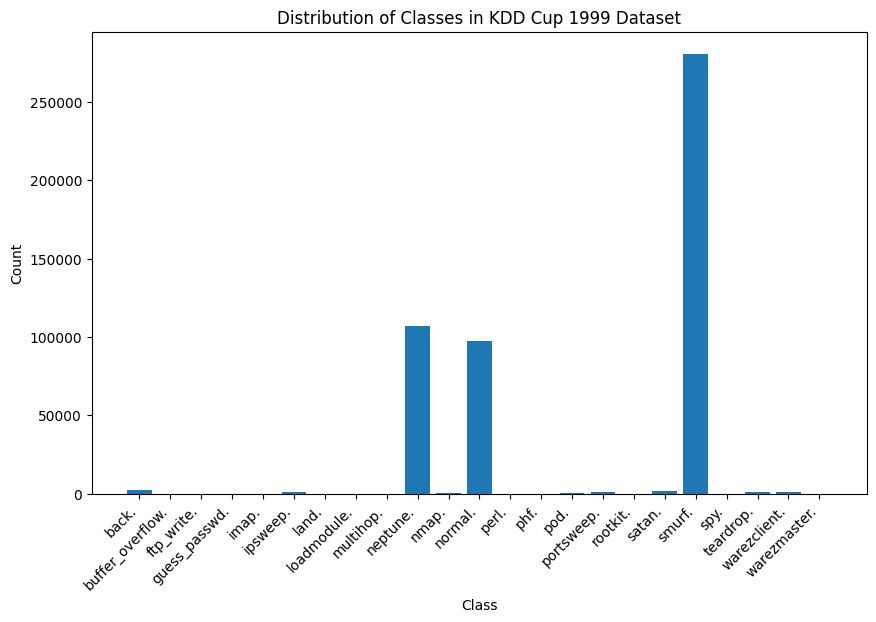

In [4]:
# prompt: plot histogram unique class

import matplotlib.pyplot as plt

# Create a histogram of the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts[0], class_counts[1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in KDD Cup 1999 Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()


# Goal: 3-class classifier (normale, neptune, smurf)

In [5]:
# Access the data and target variables
X = data.data
y = data.target

In [6]:
# prompt: change X y  to dataframe

import pandas as pd

# Convert X and y to DataFrames
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Display the first few rows of the DataFrame
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [7]:
df['target'] = df['target'].astype(str)

In [8]:
# เลื่อกมาเฉพาะ data ที่สนใจ
df_normal = df[df['target']=='normal.']
df_neptune = df[df['target']=='neptune.']
df_smurf = df[df['target']=='smurf.']

print(df_normal.shape)
print(df_neptune.shape)
print(df_smurf.shape)

(97278, 42)
(107201, 42)
(280790, 42)


# Train Test Split

10% as a test

In [9]:
# prompt: sampling  10% from each table (df_normal, df_neptune, df_sumrf) and concatenate in to test dataframe. and concatenate the rest into training dataframe

import pandas as pd
# Sample 10% from each dataframe
df_normal_test = df_normal.sample(frac=0.1, random_state=42)
df_neptune_test = df_neptune.sample(frac=0.1, random_state=42)
df_smurf_test = df_smurf.sample(frac=0.1, random_state=42)

# Concatenate the test samples
df_test = pd.concat([df_normal_test, df_neptune_test, df_smurf_test])

# Remove the test samples from the original dataframes
df_normal_train = df_normal.drop(df_normal_test.index)
df_neptune_train = df_neptune.drop(df_neptune_test.index)
df_smurf_train = df_smurf.drop(df_smurf_test.index)

# Concatenate the remaining data into the training dataframe
df_train = pd.concat([df_normal_train, df_neptune_train, df_smurf_train])


In [10]:
df_normal_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [11]:
df_neptune_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
7601,0,b'tcp',b'telnet',b'S0',0,0,0,0,0,0,...,6,1.0,0.0,0.2,0.33,1.0,0.83,0.0,0.0,neptune.
7602,0,b'tcp',b'telnet',b'S0',0,0,0,0,0,0,...,16,1.0,0.0,0.07,0.12,1.0,0.94,0.0,0.0,neptune.
53583,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,neptune.
53584,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,8,0.73,0.27,0.09,0.0,1.0,1.0,0.0,0.0,neptune.
53585,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,17,0.81,0.14,0.05,0.0,1.0,1.0,0.0,0.0,neptune.


In [12]:
df_smurf_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
7793,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,3,0.02,0.02,0.02,0.0,0.0,0.0,0.0,0.0,smurf.
7794,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,13,0.08,0.02,0.08,0.0,0.0,0.0,0.0,0.0,smurf.
7795,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,23,0.14,0.02,0.14,0.0,0.0,0.0,0.0,0.0,smurf.
7796,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,33,0.19,0.02,0.19,0.0,0.0,0.0,0.0,0.0,smurf.
7797,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,43,0.23,0.02,0.23,0.0,0.0,0.0,0.0,0.0,smurf.


# cross validation

In [13]:
df_train.shape

(436742, 42)

In [14]:
df_test.shape

(48527, 42)

## 3-fold cross validation

# HW 3 แบ่ง fold โดยการสร้าง column ใหม่

DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)[source]  


Return a random sample of items from an axis of object.

```python
.sample()```: เป็น method ที่ใช้สุ่มตัวอย่างข้อมูลจาก DataFrame  

```frac = 1```: หมายถึงการสุ่มข้อมูลทั้งหมดใน DataFrame โดยไม่ลดจำนวน (ถ้าใส่ค่าอื่นที่น้อยกว่า 1 เช่น 0.5 ก็จะสุ่มเพียง 50% ของข้อมูล)  

คำสั่งนี้เป็นการสลับลำดับของข้อมูลทั้งหมดใน df_train

In [21]:
print(f'normal: {df_normal_train.shape[0]} row')
print(f'neptune: {df_neptune_train.shape[0]} row')
print(f'smurf: {df_smurf_train.shape[0]} row')

normal: 87550 row
neptune: 96481 row
smurf: 252711 row


In [22]:
shuffled_df = df_train.sample(frac = 1, random_state = 99)
print(shuffled_df.shape)
shuffled_df.head()

(436742, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
274638,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
96151,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
234630,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
19025,0,b'tcp',b'http',b'SF',285,1337,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
263731,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [26]:
shuffled_df['fold'] = ([1,2,3]* 145581)[:436742] # แบ่งกลุ่มให้class ให้ในเเต่ละกลุ่มมี class ที่มันคละ ๆ กัน

In [29]:
print(shuffled_df.shape)
shuffled_df.head()

(436742, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,fold
274638,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,1
96151,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,2
234630,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,3
19025,0,b'tcp',b'http',b'SF',285,1337,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.,1
263731,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,2


In [33]:
shuffled_df['fold'].value_counts() # row ละกี่แถว

,count
fold,
1,145581
2,145581
3,145580


In [35]:
shuffled_df.groupby('fold')['target'].value_counts() # จำนวน class ในแต่ละ fold

fold  target  
1     smurf.      84112
      neptune.    32223
      normal.     29246
2     smurf.      84294
      neptune.    32010
      normal.     29277
3     smurf.      84305
      neptune.    32248
      normal.     29027
Name: count, dtype: int64